In [2]:
import numpy as np

In [3]:
from scipy import ndimage
from scipy import misc

In [4]:
mapache = misc.face()

In [5]:
import matplotlib.pyplot as plt

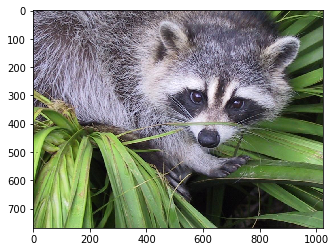

In [6]:
plt.imshow(mapache)
plt.show()

In [7]:
m1, m2, m3 = np.split(mapache, 3)

In [8]:
p1, p2, p3, p4 = np.hsplit(m1,4)
a1, a2, a3, a4 = np.hsplit(m2,4)
c1, c2, c3, c4 = np.hsplit(m3,4)

In [9]:
rompecabezas = {
    "1": p1,
    "2": p2,
    "3": p3,
    "4": p4,
    "5": a1,
    "6": a2,
    "7": a3,
    "8": a4,
    "9": c1,
    "10": c2,
    "11": c3,
    "12": c4,
}

In [10]:
def ver_tablero_mapache(tablero):
    p = tablero.flatten()
    figura, tablero = plt.subplots(3,4)
    tablero[0,0].imshow(rompecabezas[p[0]])
    tablero[0,1].imshow(rompecabezas[p[1]])
    tablero[0,2].imshow(rompecabezas[p[2]])
    tablero[0,3].imshow(rompecabezas[p[3]])
    tablero[1,0].imshow(rompecabezas[p[4]])
    tablero[1,1].imshow(rompecabezas[p[5]])
    tablero[1,2].imshow(rompecabezas[p[6]])
    tablero[1,3].imshow(rompecabezas[p[7]])
    tablero[2,0].imshow(rompecabezas[p[8]])
    tablero[2,1].imshow(rompecabezas[p[9]])
    tablero[2,2].imshow(rompecabezas[p[10]])
    tablero[2,3].imshow(rompecabezas[p[11]])
    plt.show()

In [11]:
def nuevo_tablero():
    array_aleatorio = np.random.permutation(np.arange(1,13))
    tablero = np.array(list(map(to_string, array_aleatorio)))
    return tablero.reshape(3,4)

In [12]:
def comprobarCompletado(tablero):
    array_tablero = tablero.flatten()
    array_tablero_ordenado = np.array(list(map(to_string, np.arange(1,13))))
    puntos_error = 0
    condicion_son_iguales = array_tablero == array_tablero_ordenado
    for condicion in condicion_son_iguales:
        if(condicion != True):
            puntos_error = puntos_error + 1
    if(puntos_error != 0):
        return False
    else:
        return True

In [13]:
def intercambiarPosiciones(tablero, pieza1, pieza2):
    tablero_intercambio = tablero.flatten()
    indp1 = np.where(tablero_intercambio==pieza1)
    indp2 = np.where(tablero_intercambio==pieza2)
    tablero_intercambio[indp1[0]] = pieza2
    tablero_intercambio[indp2[0]] = pieza1
    return tablero_intercambio.reshape(3,4)

In [14]:
def to_string(valor):
    return str(valor)


Puzzle

	1 - ver rompecabezas
	2 - Mover piezas
	3 - salir
Selecciona una opción: 1
Posiciones de las piezas

[['1' '11' '5' '4']
 ['7' '9' '6' '8']
 ['3' '2' '10' '12']]

MAPACHE



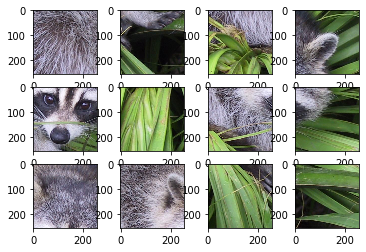


Puzzle

	1 - ver rompecabezas
	2 - Mover piezas
	3 - salir
Selecciona una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 5
Escriba el segundo elemento: 4

***Los elementos 5 y 4 han sido intercambiados***


Puzzle

	1 - ver rompecabezas
	2 - Mover piezas
	3 - salir
Selecciona una opción: 1
Posiciones de las piezas

[['1' '11' '4' '5']
 ['7' '9' '6' '8']
 ['3' '2' '10' '12']]

MAPACHE



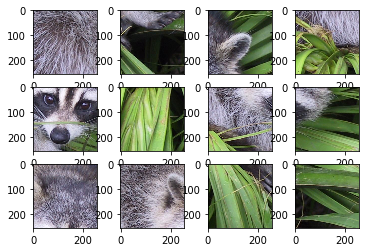


Puzzle

	1 - ver rompecabezas
	2 - Mover piezas
	3 - salir
Selecciona una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 3
Escriba el segundo elemento: 5

***Los elementos 3 y 5 han sido intercambiados***


Puzzle

	1 - ver rompecabezas
	2 - Mover piezas
	3 - salir
Selecciona una opción: 1
Posiciones de las piezas

[['1' '11' '4' '3']
 ['7' '9' '6' '8']
 ['5' '2' '10' '12']]

MAPACHE



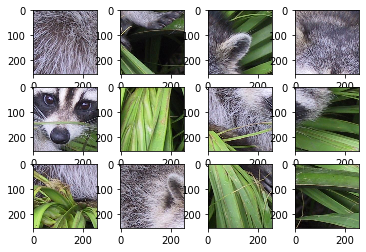


Puzzle

	1 - ver rompecabezas
	2 - Mover piezas
	3 - salir


In [ ]:
def menu():
    opcion = 0
    tablero_pos = nuevo_tablero()
    
    print("\nPuzzle\n")
    print ("\t1 - ver rompecabezas")
    print ("\t2 - Mover piezas")
    print ("\t3 - salir")
while True:
    menu()
    opcionMenu = input("Selecciona una opción: ")
    
    
    if opcionMenu=="1":
        print("Posiciones de las piezas\n")
        print(np.matrix(tablero_pos))
        print("\nMAPACHE\n")
        ver_tablero_mapache(tablero_pos)
    
    elif opcionMenu=="2":
        print("\nIngrese los elementos a intercambiar\n")
        pos1 = input("Escriba el primer elemento: ")
        pos2 = input("Escriba el segundo elemento: ")
        try:
            posicion1 = int(pos1)
            posicion2 = int(pos2)
            if(posicion1 > 0 and posicion1 < 13 and posicion2 > 0 and posicion2 < 13):
                tablero_pos = intercambiarPosiciones(tablero_pos, pos1, pos2)
                print(f"\n***Los elementos {posicion1} y {posicion2} han sido intercambiados***\n")
                if(comprobarCompletado(tablero_pos)):
                    print("Rompecabezas Completado")
                    ver_tablero_mapache(tablero_pos)
                    opcion = 5
            else:
                print("***El elemento no esta en la lista***\n")
                opcion = 5
        except Exception as error:
            print("***Ingrese solo numeros***\n")
        
    elif opcionMenu=="3":
        break
    else:
        print ("")
        input("No ha seleccionado ninguna opción correcta...\n")
        
        